# **Harris Corner Detector**

Implement a baisc Harris Corner Detector from scratch

refs:
- https://www.cs.umd.edu/class/fall1019/cmsc426-0101/files/12_HarrisCornerDetection.pdf
- https://www.cs.cmu.edu/~16385/s17/Slides/6.2_Harris_Corner_Detector.pdf
- http://www.bmva.org/bmvc/1988/avc-88-023.pdf
- https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Settings

In [193]:
block_sz = 5
k = 0.005
thresh = 1e-2

In [194]:
# Sobel kernels
Sx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

Sy = Sx.T

# Gaussian Kernel
G = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]])/16

## Get Test Image

In [229]:
from skimage.data import brick

image = brick().astype(np.float32)

# (OPTIONAL) blurr image --> This will change hyperparameters
# image = cv2.blur(image, ksize=(5,5))

# 0-1 normalize
image /= image.max()

Compute x and y derivatives

In [230]:
dx = cv2.filter2D(image, ddepth=-1, kernel=Sx)
dy = cv2.filter2D(image, ddepth=-1, kernel=Sy)

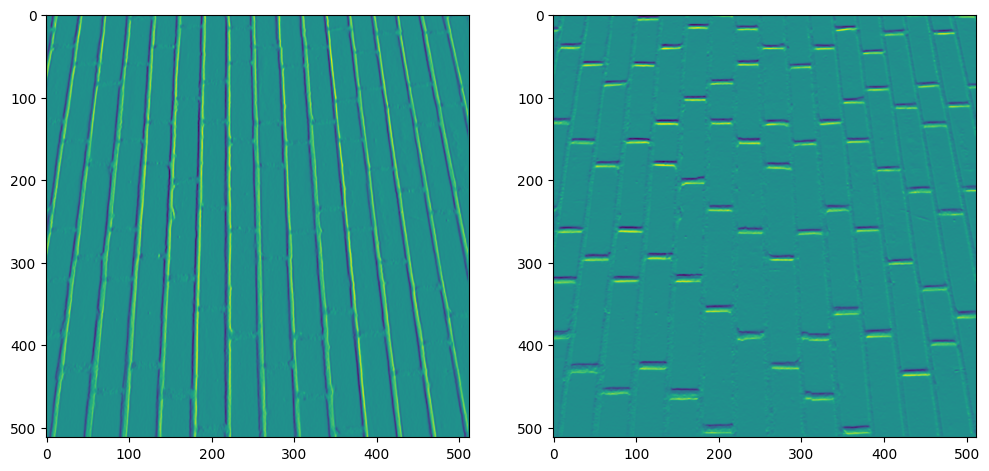

In [231]:
_, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(dx)
ax[1].imshow(dy);

In [392]:
# get smoothed square derivatives

# # no Filter
# A = dx*dx
# B = dy*dy
# C = dx*dy

# Gaussian Filter
A = cv2.filter2D(dx*dx, ddepth=-1, kernel=G)
B = cv2.filter2D(dy*dy, ddepth=-1, kernel=G)
C = cv2.filter2D(dx*dy, ddepth=-1, kernel=G)

# Box Filter
# A = cv2.boxFilter(dx*dx, ddepth=-1, ksize=(block_sz,block_sz))
# B = cv2.boxFilter(dy*dy, ddepth=-1, ksize=(block_sz,block_sz))
# C = cv2.boxFilter(dx*dy, ddepth=-1, ksize=(block_sz,block_sz))

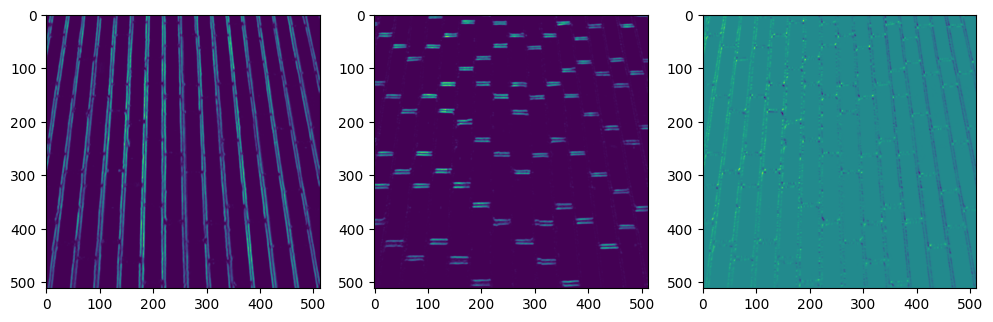

In [393]:
_, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(A)
ax[1].imshow(B)
ax[2].imshow(C);

## Compute Corner Response at each pixel

In [394]:

R = (A*B - (C*C)) - k*(A + B)*(A + B)

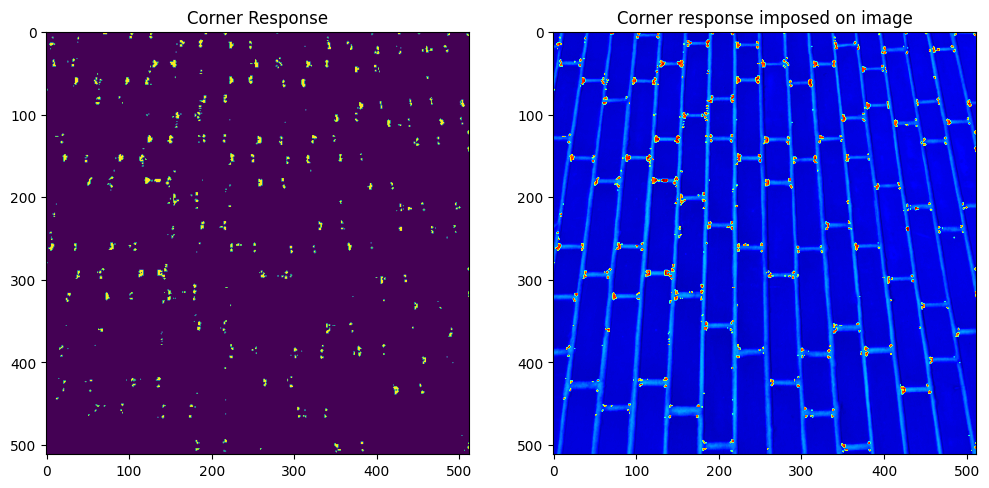

In [395]:
_, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(R > 1e-2)
ax[0].set_title("Corner Response")
ax[1].imshow(image*2 + (R > 1e-2)*3, cmap='jet')
ax[1].set_title("Corner response imposed on image");

## Get individual corners

In [238]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(R > 3e-2))
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(image, np.float32(centroids), (9,9), (-1,-1), criteria)

In [244]:
image_out = np.dstack((image, image, image))
for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


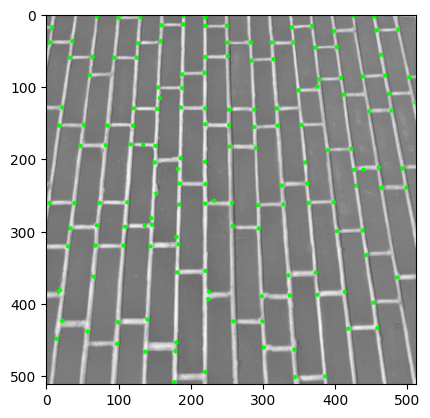

In [245]:
plt.imshow(image_out);

# Explore derivative distributions around each corner 

In [348]:
x, y = corners[150]

x = np.round(x).astype(int)
y = np.round(y).astype(int)

x, y

(493, 213)

In [374]:
# x, y = 493, 213 # corner
# x, y = 485, 485 # flat region with win size=12
w_sz = 30 # window size
dx_win = dx[x-w_sz:x+w_sz+1, y-w_sz:y+w_sz+1]
dy_win = dy[x-w_sz:x+w_sz+1, y-w_sz:y+w_sz+1]


# center data
dx_win -= dx_win.mean()
dy_win -= dy_win.mean()

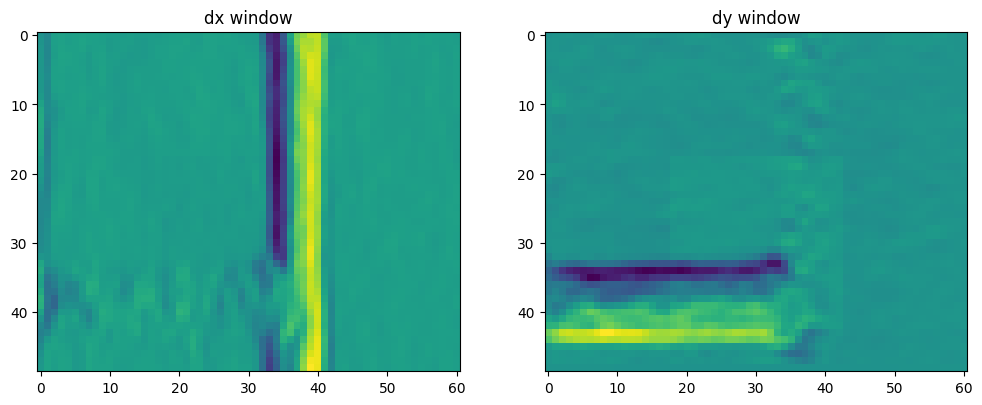

In [375]:
_, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(dx_win)
ax[0].set_title("dx window")

ax[1].imshow(dy_win)
ax[1].set_title("dy window");

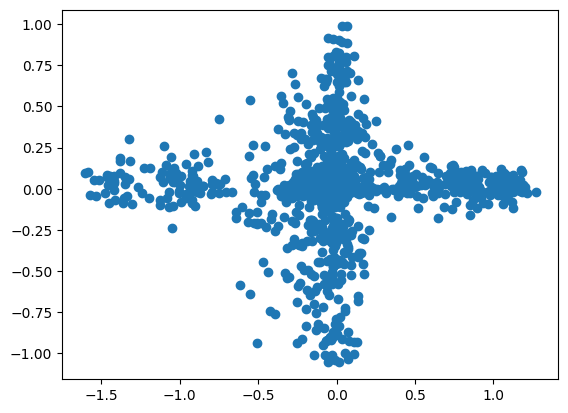

In [376]:
plt.scatter(dx_win.flatten(), dy_win.flatten());